## Table of Contents:
#### 01. Importing libraries
#### 02. Importing the dataframe
#### 03. Creating a histogram
#### 04. Creating a bar chart
#### 05. Creating a line chart
#### 06. Creating a line chart for customer demographics
#### 07. Creating a scatterplot
#### 08. Exporting the visualizations

## 01. Importing libraries

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing the dataframe

In [2]:
# defining the path

path=r'/Users/sanju/Documents/Jul 2023 Instacart Basket Analysis'

In [3]:
# importing the 'ords_prods_cust_merged.pkl' dataset

df_merged=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_merged.pkl'))

In [4]:
# checking the import

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int32   
 1   First Name              object  
 2   surname                 object  
 3   Gender                  object  
 4   state                   object  
 5   Age                     int8    
 6   date_joined             object  
 7   no_of_dependants        int8    
 8   fam_status              object  
 9   income                  int32   
 10  order_id                int32   
 11  order_number            int8    
 12  orders_day_of_week      int8    
 13  order_hour_of_day       int8    
 14  days_since_prior_order  float16 
 15  product_id              int32   
 16  add_to_cart_order       int32   
 17  reordered               int8    
 18  _merge                  category
 19  product_name            object  
 20  aisle_id                int16   
 21  depart

In [5]:
df_merged.head()

,user_id,First Name,surname,Gender,state,Age,date_joined,no_of_dependants,fam_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order_days,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Busiest Day,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Regularly Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Busiest Day,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Regularly Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Least Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer


## 03. Creating a histogram

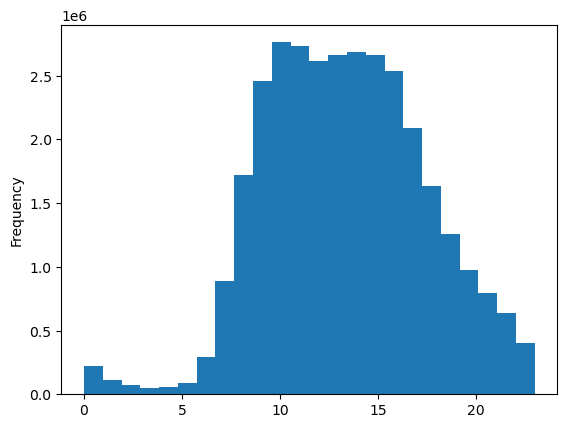

In [6]:
# creating a histogram of the 'order_hour_of_day' column

hist=df_merged['order_hour_of_day'].plot.hist(bins=24)

#### the above histogram shows that the highest number of orders are placed by the customers in between 9:00 - 17:00 hours

## 04. Creating a bar chart

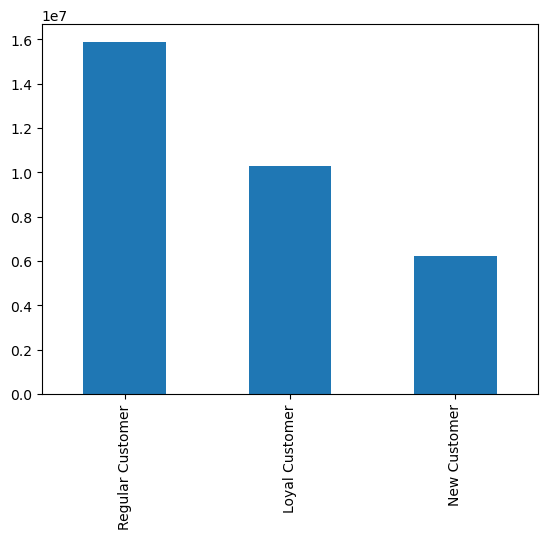

In [7]:
# creating a bar chart of the 'loyalty_flag' column

bar=df_merged['loyalty_flag'].value_counts().plot.bar()

## 05. Creating a line chart

In [40]:
# Creating Sample Data

np.random.seed(4)

In [41]:
# creating a list holding true/false values to the test np.random.rand()<=70

dev=np.random.rand(len(df_merged))<=0.7

In [42]:
# checking the result

dev

array([False,  True, False, ...,  True,  True,  True])

In [43]:
# splitting the 'df_merged' dataframe
# storing 70% of the sample in the dataframe 'big'

big=df_merged[dev]

In [44]:
# storing 30% of the sample in the dataframe 'small'

small=df_merged[~dev]

In [45]:
# checking the length of the whole dataframe

len(df_merged)

32404859

In [46]:
# checking the length of the split

len(big) + len(small)
            

32404859

In [47]:
# reducing the columns of the sample dataframe 'small'

df_merged_small=small[['order_hour_of_day','prices']]

In [48]:
df_merged_small.head()

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,12.6
6,8,12.6
10,11,4.3


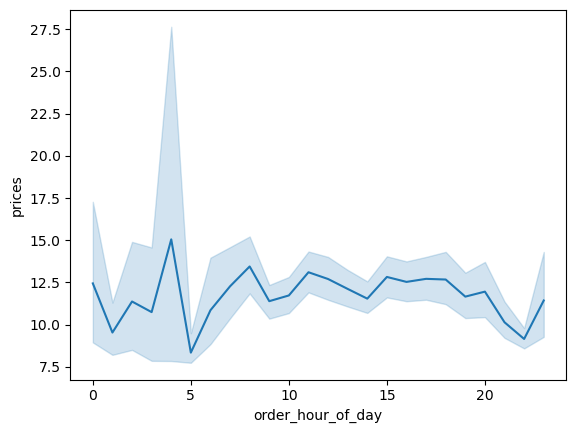

In [49]:
# creating a line chart of the 'small' sample dataframe

line=sns.lineplot(data=df_merged_small,x='order_hour_of_day',y='prices')

## 06. Creating a line chart for customer demographics

In [17]:
# picking the columns 'age' and 'no. of dependants' of the 'sample' dataframe

df_merged_age=small[['Age','no_of_dependants']]

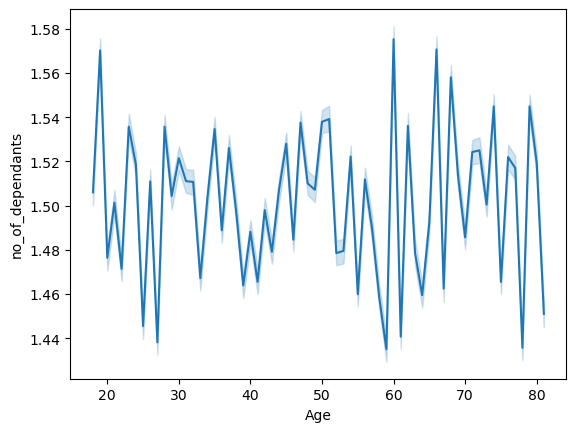

In [18]:
# creating a line chart of the 'small' sample dataframe between age and no. of dependants

line_2=sns.lineplot(data=df_merged_age,x='Age',y='no_of_dependants')

#### the above line chart shows that there is no connection in between age and the number of dependants

## 07. Creating a scatterplot

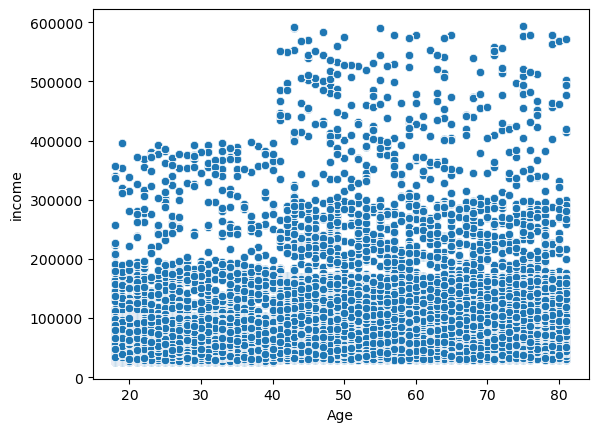

In [19]:
# creating a scatterplot between 'age' and 'income'

scatter=sns.scatterplot(x='Age',y='income', data=df_merged)

#### the above scatterplot shows that as the age increases, the income also increases. Customers of the age 40 and above earn approximately 400k and above

## 08. Exporting the visualizations

In [20]:
# exporting the histogram

hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_order_hour_of_day.png'))

In [50]:
# exporting the bar chart

bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_flag.png'),bbox_inches='tight')

In [27]:
# exporting the line charts

line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_hour_of_day_price.png'),bbox_inches='tight')

In [26]:
line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_age_dependants.png'),bbox_inches='tight')

In [24]:
# exporting the scatterplot

scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_age_income.png'))